In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Datas

In [4]:
market_ticker = '^GSPC' #^GSPC
st = 'f'

stime='2016-01-01'
ftime=None

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval='1wk'):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))



df.head(3)

,^GSPC
Date,
2015-12-28,2043.939941
2016-01-04,1922.030029
2016-01-11,1880.329956


In [6]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = df.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(df.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = df.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = np.insert(gf_vv, 0, 0)
    gf_vv = np.delete(gf_vv, -1)
    return gf_vv

df[f"% update {market_ticker}"] = add_percent_update(market_ticker)
# gf[f"% update {st}"] = add_percent_update(st)

df.head(3)

,^GSPC,% update ^GSPC
Date,,
2015-12-28,2043.939941,0.000000
2016-01-04,1922.030029,-5.964457
2016-01-11,1880.329956,-2.169585


In [7]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    if df.iloc[i, 1] > 0:
        r[i] = 'Plus'
    else:
        r[i] = 'Minus'
        
df['Side'] = r        

Signal module

MACD test

In [8]:
''' MACD tests 


if macd_signal more or less 0 
True     657
False    598

if macd more or less 0 
True     656
False    599
12

if macd_signal more or less then previous macd
False    636
True     619

if macd more or less then previous macd
True     634
False    621

if macd and macd_signal more or less then previous 
False    636
True     619

if macd more or less macd_signal
True     637
False    618

if macd more or less 0, and macd_signal conversly
True   638
False  617


if macd more or less -1,-2
False    621
True     607
30.5

if macd_signal more or less -1,-2
False    625
True     603
19.9

if macd more or less 0 and macd_signal-1 conversly + macd_signal conversly macd
True     602
False    523
43.57497817317594

if masi 3/-3
60

if masi 1/-1
30

if masi 3/-4
69

if masi 3/-3.5
75

if masi percent 10/-15
71.61258606208699

if masi percent 15/-15
105


if masi percent 20/-15  !!!!
112.8

if masi with macd_signal percent 20/-15  !!!!
115.7


macd_signal and masi intersaction 20/-15  and side 0.9
120.3

'''


fma = 12
sma = 26


r = list(df[f'% update {market_ticker}'].values)
df['Signal'] = r

df['ma_fast'] = df[market_ticker].ewm(span=fma, adjust=False).mean()
df['ma_slow'] = df[market_ticker].ewm(span=sma, adjust=False).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal_macd'] = df['macd'].ewm(span=9, adjust=False).mean()
df['masi'] = df['macd'] - df['signal_macd']


p_per = 100
m_per = -90

beta = 1
beta2 = beta/beta

for i in range(len(r)):
    try:
        ''' macd middle line '''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 6] > 0 and df.iloc[i-1, 6] < 0 and df.iloc[i, 7] > 0:
#             r[i+1] = 'Long'
#         elif df.iloc[i, 6] < 0 and df.iloc[i-1, 6] > 0 and df.iloc[i, 7] < 0:
#             r[i+1] = 'Short'
#         else:
#             pass


        ''' macd and masi intersaction'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Short'
        # elif df.iloc[i, 8] > (df.iloc[i, 6]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 6]/100 * p_per * beta):
        #     r[i+1] = 'Long'
        # elif df.iloc[i, 8] < (df.iloc[i, 6]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 6]/100 * m_per * beta):
        #     r[i+1] = 'Short'
        # else:
        #     pass
        
#         ''' macd_signal and masi intersaction'''
#         if i < sma:
#             r[i] = None
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Short'
#         elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
#             r[i+1] = 'Long'
#         elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
#             r[i+1] = 'Short'
#         else:
#             pass
        
        
        # ''' macd_signal and masi intersaction and side'''
        # if i < sma:
        #     r[i] = None
        # elif df.iloc[i, 8] > 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # elif df.iloc[i, 8] < 0:
        #     if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
        #         r[i+1] = 'Short'
        #     elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
        #         r[i+1] = 'Long'
        #     elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
        #         r[i+1] = 'Short'
        #     else:
        #         pass
        # else:
        #     pass
        

        ''' macd_signal and masi intersaction and side'''
        if i < sma:
            r[i] = None
        elif df.iloc[i, 8] > 0:
            if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9):
                r[i+1] = 'Short'
            elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9):
                r[i+1] = 'Short'
            else:
                pass
        elif df.iloc[i, 8] < 0:
            if df.iloc[i, 8] > (df.iloc[i, 7]/100 * m_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * m_per * beta * 0.9):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * p_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * p_per * beta):
                r[i+1] = 'Short'
            elif df.iloc[i, 8] > (df.iloc[i, 7]/100 * p_per * beta * 0.9) and df.iloc[i-1, 8] < (df.iloc[i, 7]/100 * p_per * beta * 0.9):
                r[i+1] = 'Long'
            elif df.iloc[i, 8] < (df.iloc[i, 7]/100 * m_per * beta) and df.iloc[i-1, 8] > (df.iloc[i, 7]/100 * m_per * beta):
                r[i+1] = 'Short'
            else:
                pass
        else:
            pass
        
        
    except:
        pass

df['Signal'] = r
df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-12,3852.360107,-2.084694,Minus,-2.084694,3910.606569,3950.821651,-40.215082,-68.743447,28.528366
2022-12-19,3844.820068,-0.195725,Minus,-0.195725,3900.485569,3942.969682,-42.484113,-63.491580,21.007468
2022-12-27,3819.060059,-0.669993,Minus,-0.669993,3887.958568,3933.791191,-45.832624,-59.959789,14.127165


Закрытие пробелов 

In [9]:
''' заполняем пробелы '''
r = list(df['Signal'].values)


for i in range(len(r)):
    if df.iloc[i, 3] == None:
        pass
    elif type(df.iloc[i, 3]) == str:
        if df.iloc[i, 3] == 'Long' or df.iloc[i, 3] == 'Short':
            pass 
        else:
            df.iloc[i, 3] = df.iloc[i-1, 3]
    else:
        df.iloc[i, 3] = df.iloc[i-1, 3]
        

df.tail(3)

,^GSPC,% update ^GSPC,Side,Signal,ma_fast,ma_slow,macd,signal_macd,masi
Date,,,,,,,,,
2022-12-12,3852.360107,-2.084694,Minus,Long,3910.606569,3950.821651,-40.215082,-68.743447,28.528366
2022-12-19,3844.820068,-0.195725,Minus,Long,3900.485569,3942.969682,-42.484113,-63.491580,21.007468
2022-12-27,3819.060059,-0.669993,Minus,Long,3887.958568,3933.791191,-45.832624,-59.959789,14.127165


Result module

In [10]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Short':
            r[i] = True
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Long':    
            r[i] = True
        elif df.iloc[i, 2] == 'Minus' and df.iloc[i, 3] == 'Long':    
            r[i] = False  
        elif df.iloc[i, 2] == 'Plus' and df.iloc[i, 3] == 'Short':    
            r[i] = False 
        else:
            r[i] = None
    except:
        pass
    
df['Result'] = r
df['Result'].value_counts()
# df.tail(300)
# df.head(300)

True     119
False     97
Name: Result, dtype: int64

Sum

In [11]:
r = list(df[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = (df.iloc[i, 1] * -1)
        elif df.iloc[i, 3] == 'Long':
            r[i] = df.iloc[i, 1]
        else:
            r[i] = 0
    except:
        pass
    
df['Sum'] = r
df['Sum'].sum()
# df.tail(100)

27.406117405300208

In [12]:
df1 = df.reset_index(drop=True)

In [13]:
r = list(df1[f'% update {market_ticker}'].values)

for i in range(len(r)):
    try:
        if df.iloc[i, 3] == 'Short':
            r[i] = 1
        elif df.iloc[i, 3] == 'Long':
            r[i] = 5
        else:
            r[i] = 0
    except:
        pass
    
df1['bars'] = r

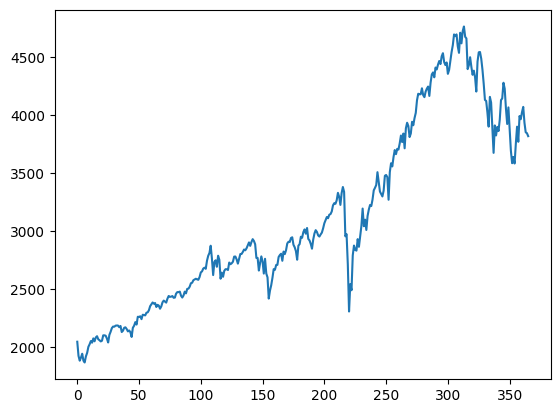

In [14]:
plt.plot(df1.index, df1[f'{market_ticker}'])

<BarContainer object of 366 artists>

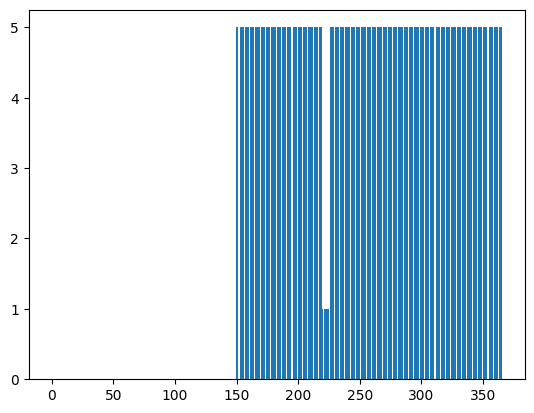

In [15]:
plt.bar(df1.index, df1['bars'])